# EDA

Import Library

In [147]:
#import library
import pandas as pd
import numpy as np
!pip install mlxtend
!pip install kneed
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mengimport Dataset dan memunculkan 10 sample


In [148]:
import pandas as pd
url = 'https://raw.githubusercontent.com/vaa9/datasetterapi/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv'
df = pd.read_csv(url)
df.sample(10)

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
30,1,23,5.75,2.0,1.0,43,7.0,1
21,1,15,3.00,2.0,3.0,900,70.0,1
2,1,32,12.00,9.0,1.0,43,50.0,0
46,1,43,11.00,7.0,1.0,507,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
81,2,47,3.75,14.0,2.0,67,50.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1
18,2,56,11.75,7.0,1.0,31,50.0,0
9,2,15,1.75,1.0,2.0,49,7.0,0
87,2,52,2.25,5.0,1.0,63,7.0,1


memunculkan info terkait dataset untuk mengetahui type dan juga jumlah row dan columns nya

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


Mencari tau jumlah null dalam dataset

In [150]:
df.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

Menggunakan KNN Imputer untuk mengisi kekosongan dataset karena data akan lebih mudah dan efisien apabila menggunakan knn Imputer

In [151]:
from sklearn.impute import KNNImputer
isi = KNNImputer(n_neighbors=5)
df = pd.DataFrame(isi.fit_transform(df), columns=df.columns)

Mengecek kembali kekosongan dataset untuk memastikan bahwa sudah terisi semua

In [152]:
df.isnull().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

Memunculkan heatmap korelasi pada dataset tersebut untuk melihat mana mana saja yang lebih tinggi korelasinya

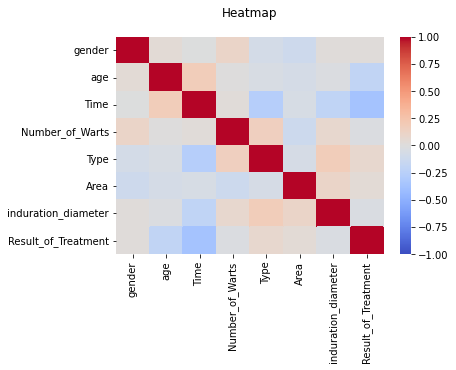

In [153]:
corr = df.corr()

import seaborn as sns

sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Heatmap', pad=20)
plt.show()

# Mengatasi Imbalance

Mengecek data saat ini terkait variable dependent

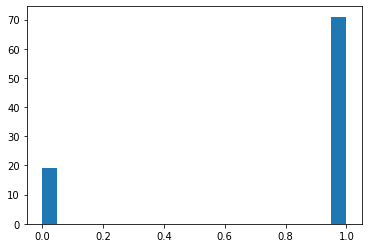

In [154]:
import matplotlib.pyplot as plt
plt.hist(df['Result_of_Treatment'], bins=20)
plt.show()

memisahkan variable dependen dan independen untuk melakukan SMOTE

In [155]:
X = df.drop(['Result_of_Treatment'],axis=1)
y = df['Result_of_Treatment']

Menggunakan metode SMOTE untuk mengatasi imbalance dataset

In [156]:
from imblearn.over_sampling import SMOTE 
over_sample = SMOTE()
X, y = over_sample.fit_resample(X, y)

mengecek kembali variabel dependen pada dataset untuk memastikan sudah seimbang

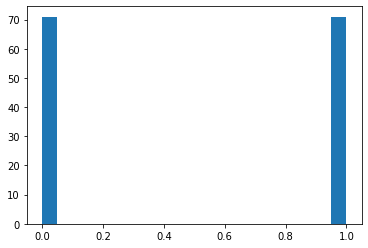

In [157]:
plt.hist(y, bins=20)
plt.show()

# Data Preprocessing

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

Melakukan standard scaler untuk menormalisasi data dari beberapa kesalahan besar

In [159]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Regression

mengimport library logistic regression dan memasukkannya kedalam data yang sudah ditraining

In [160]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

Memunculkan prediksi terhadap variabel dependen

In [161]:
y_pred = lr.predict(X_test)
print(y_pred)

[1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.]


Memunculkan skor akurasi dan confussion matrix

In [162]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[8 2]
 [2 3]]
Accuracy Score:  0.7333333333333333


# Classification


## Naive Bayes

In [163]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [164]:
y_pred = gnb.predict(X_test)
print(y_pred)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[9 1]
 [4 1]]
Accuracy Score:  0.6666666666666666


## KNN 

In [166]:
from sklearn.neighbors import KNeighborsClassifier

mklasifikasi = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean", p = 2)
mklasifikasi.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [167]:
y_pred = mklasifikasi.predict(X_test)
print(y_pred)

[1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]


In [168]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[9 1]
 [1 4]]
Accuracy Score:  0.8666666666666667


# Clustering

## K-Means

mengubah data menggunakan standard scaler terlebih dahulu

In [169]:
sc = StandardScaler()
df2 = sc.fit_transform(df)

menggunakan metode agglomerative k-means untuk memunculkan grafik 

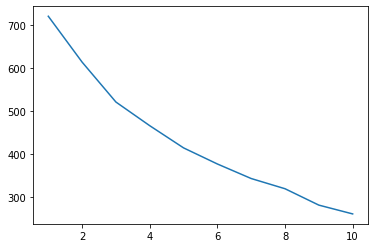

In [170]:
from sklearn.cluster import AgglomerativeClustering, KMeans
ssquares = []
for i in range(1,11) :
  km = KMeans(i ,max_iter=500, random_state=32)
  km.fit(df2)
  ssquares.append(km.inertia_)
plt.plot(range(1,11), ssquares)
plt.show()

menggunakan knee locator untuk memunculkan best k atau k yang paling sesuai dengan model data set kita

In [171]:
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), ssquares, curve="convex", direction="decreasing")
print("the best k for your model is ",findknee.elbow)

the best k for your model is  5


memasukkan function k-means kepada tiap tiap data dalam df untuk memprediksi result of treatment

In [172]:
km_model = KMeans(n_clusters = findknee.elbow, random_state=1)
y_kmeans = km_model.fit_predict(df)
y_kmeans

array([0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 3,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

menggunakan agglomerative clustering untuk memprediksi dan memasukkannya kedalam dataset yang sudah kita miliki

In [173]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(4)
cls = cl.fit_predict(df)
df['Result_of_Treatment']=cls
df.head(5)

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1.0,15.0,11.00,6.0,1.0,30.0,25.0,1
1,1.0,27.0,11.75,2.6,1.0,208.0,6.0,3
2,1.0,32.0,12.00,9.0,1.0,43.0,50.0,1
3,1.0,33.0,1.75,7.0,2.0,379.0,7.0,0
4,1.0,34.0,5.00,7.0,3.0,64.0,7.0,1


membuat kesimpulan dari clustering yang sudah dibuat

In [174]:
df['Result_of_Treatment'] = cls
df.groupby('Result_of_Treatment').agg(gender=('gender', pd.Series.mode),
                          age=('age', 'mean'),
                          time=('Time', 'mean'), 
                          number_warts =('Number_of_Warts', 'mean'),
                          type_warts= ('Type', pd.Series.mode),
                          Area = ('Area', 'mean'),
                          induration_diameter = ('induration_diameter', 'mean'),
                          Count = ('Result_of_Treatment', 'count'))


,gender,age,time,number_warts,type_warts,Area,induration_diameter,Count
Result_of_Treatment,,,,,,,,
0,1.0,33.142857,7.535714,6.285714,1.0,415.857143,6.000000,7
1,2.0,31.500000,7.169079,6.394737,1.0,49.197368,14.778947,76
2,1.0,15.000000,3.000000,2.000000,3.0,900.000000,70.000000,1
3,2.0,25.500000,8.291667,2.600000,1.0,177.166667,10.833333,6


## Hierarchical 

memunculkan dendogram complete 

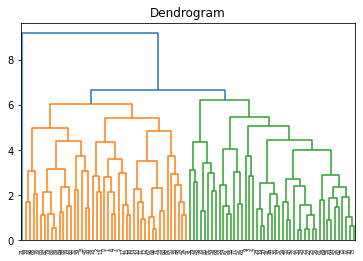

In [175]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df2, method = 'complete'))
plt.title('Dendrogram')
plt.show()

menggunakan agglomerative clustering untuk memprediksi result of treatment dan memasukkannya kedalam dataset

In [176]:
from sklearn.cluster import AgglomerativeClustering
cl = AgglomerativeClustering(4,affinity = 'euclidean', linkage = 'complete')
hirar = cl.fit_predict(df2)
df['Result_of_Treatment']=hirar
df.sample(5)

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
39,1.0,30.0,1.00,2.0,1.0,88.0,3.0,0
5,1.0,38.0,12.00,14.0,1.0,87.0,6.0,0
69,2.0,24.0,4.25,1.0,1.0,174.0,30.0,2
30,1.0,23.0,5.75,2.0,1.0,43.0,7.0,2
40,1.0,35.0,9.75,2.0,2.0,8.0,6.0,2


Membuat kesimpulan terhadap hierarchical clustering

In [177]:
df['Result_of_Treatment'] = hirar
df.groupby('Result_of_Treatment').agg(gender=('gender', pd.Series.mode),
                          age=('age', 'mean'),
                          time=('Time', 'mean'), 
                          number_warts =('Number_of_Warts', 'mean'),
                          type_warts= ('Type', pd.Series.mode),
                          Area = ('Area', 'mean'),
                          induration_diameter = ('induration_diameter', 'mean'),
                          Count = ('Result_of_Treatment', 'count'))


,gender,age,time,number_warts,type_warts,Area,induration_diameter,Count
Result_of_Treatment,,,,,,,,
0,2.0,37.818182,8.815909,6.195455,1.0,108.022727,10.863636,44
1,2.0,32.250000,3.681250,7.500000,3.0,49.875000,53.125000,8
2,1.0,23.162162,6.216216,5.756757,1.0,69.216216,8.843243,37
3,1.0,15.000000,3.000000,2.000000,3.0,900.000000,70.000000,1
